**N-01 LINEAR REGRESSION (SLR AND MLR)**

 - Prediksi kematian selama pengobatan
 - Sumber dataset dari ***Open Data Bantul***

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
link = 'https://raw.githubusercontent.com/iyanrspian/uts-machine-learning/main/cure-success-rate-tb.csv'
data = pd.read_csv(link)
data.head()

,puskesmas,kecamatan,cure_rate,succese_rate,kematian_selama_pengobatan
0,Srandakan,SRANDAKAN,60,60,1
1,Sanden,SANDEN,75,75,1
2,Kretek,KRETEK,100,100,0
3,Pundong,PUNDONG,70,70,1
4,Bambanglipuro,BAMBANGLIPURO,80,80,1


A. Simple Linear Regresion

In [3]:
# Update dataset yang akan diperlukan saja
data_update = pd.read_csv(link, usecols=['succese_rate', 'kematian_selama_pengobatan'])
data_update.tail()

,succese_rate,kematian_selama_pengobatan
22,57,78
23,89,88
24,100,0
25,100,0
26,100,0


In [4]:
# Membuat variabel X, y dan split data (training & testing) dengan porsi 80:20
from sklearn.model_selection import train_test_split

X = data_update['succese_rate'].values.reshape(-1,1)
y = data_update['kematian_selama_pengobatan'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
# Menghitung mean, standard deviation dan variance
data_result = data_update.describe().loc[['mean', 'std']]
data_result.loc['variance'] = data_result.loc['std']**2
print(data_result)

          succese_rate  kematian_selama_pengobatan
mean         79.962963                   37.444444
std          18.984774                   39.998397
variance    360.421652                 1599.871795


In [6]:
# Menghitung covariance dan coeffisient of correlation
print("'Covariance'\n\n", data_update.cov())
print("\n'Coeffisient of Correlation - Pearson Method'\n\n", data_update.corr(method="pearson"))

'Covariance'

                             succese_rate  kematian_selama_pengobatan
succese_rate                  360.421652                 -445.482906
kematian_selama_pengobatan   -445.482906                 1599.871795

'Coeffisient of Correlation - Pearson Method'

                             succese_rate  kematian_selama_pengobatan
succese_rate                    1.000000                   -0.586655
kematian_selama_pengobatan     -0.586655                    1.000000


In [7]:
# Membuat object Linear Regression dan Training Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
# Mencari tahu nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-0.96123807]]
[112.39369395]


In [9]:
# Mencari tahu accuracy score dari model, menggunakan testing data yang sudah displit sebelumnya.
accuracy = lin_reg.score(X_test, y_test)
print("\nAccuracy score :", str(round(accuracy, 2)*100) + '%')


Accuracy score : 60.0%


In [10]:
# Prediksi dengan nilai cure_rate sebagai berikut
print("[63] =", lin_reg.predict([[63]]))
print("[59] =", lin_reg.predict([[59]]))
print("[71] =", lin_reg.predict([[71]]))

[63] = [[51.83569569]]
[59] = [[55.68064796]]
[71] = [[44.14579115]]


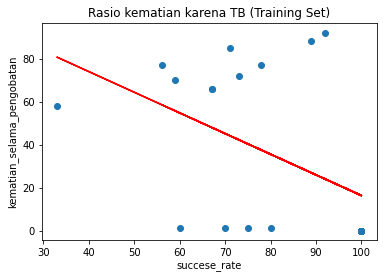

In [11]:
# Visualisasi (train set)
y_predict = lin_reg.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_predict, color='red')
plt.title('Rasio kematian karena TB (Training Set)')
plt.xlabel('succese_rate')
plt.ylabel('kematian_selama_pengobatan')
plt.show()

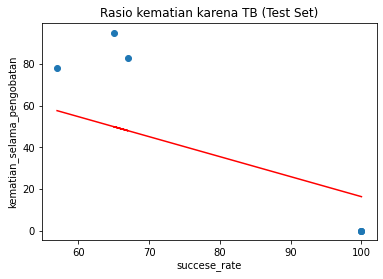

In [12]:
# Visualisasi (test set)
y_predict = lin_reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='red')
plt.title('Rasio kematian karena TB (Test Set)')
plt.xlabel('succese_rate')
plt.ylabel('kematian_selama_pengobatan')
plt.show()